# RETETNTION ANALYSIS

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

In [3]:
data = pd.read_csv('Online_Retail_Data.csv')

In [4]:
data.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


# Data Cleansing

In [6]:
data['order_date'] = pd.to_datetime(data['order_date']).dt.date.astype('datetime64')

In [7]:
data.isnull().sum()

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64

In [8]:
data = data[~ data['customer_id'].isnull()]

In [9]:
data.isnull().sum()

order_id        0
product_code    0
product_name    0
quantity        0
order_date      0
price           0
customer_id     0
dtype: int64

In [10]:
data.duplicated().sum()

6411

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data ['product_name']= data['product_name'].str.lower()

In [13]:
data['quantity'] = data['quantity'].abs()

In [14]:
data['order_status'] = np.where(data['order_id'].str[:1]=='C', 'Cenceled', 'Delivered')

In [15]:
data['amount'] = data['price'] * data['quantity']

In [16]:
data['customer_id'] = data['customer_id'].astype(str)

In [17]:
data = data[data['price'] > 0]

In [18]:
from scipy import stats

data = data[(np.abs(stats.zscore(data[['price', 'amount']]))<3).all(axis=1)]
data.reset_index (drop=True, inplace=True)

In [19]:
data.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount
0,493410,TEST001,this is a test product.,5,2010-01-04,4.50,12346.0,Delivered,22.50
1,C493411,21539,retro spots butter dish,1,2010-01-04,4.25,14590.0,Cenceled,4.25
2,493412,TEST001,this is a test product.,5,2010-01-04,4.50,12346.0,Delivered,22.50
3,493414,21844,retro spot mug,36,2010-01-04,2.55,14590.0,Delivered,91.80
4,493414,21533,retro spot large milk jug,12,2010-01-04,4.25,14590.0,Delivered,51.00


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352813 entries, 0 to 352812
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      352813 non-null  object        
 1   product_code  352813 non-null  object        
 2   product_name  352813 non-null  object        
 3   quantity      352813 non-null  int64         
 4   order_date    352813 non-null  datetime64[ns]
 5   price         352813 non-null  float64       
 6   customer_id   352813 non-null  object        
 7   order_status  352813 non-null  object        
 8   amount        352813 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 24.2+ MB


## Retention Analysis

In [21]:
df = data.copy()

In [22]:
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount
0,493410,TEST001,this is a test product.,5,2010-01-04,4.50,12346.0,Delivered,22.50
1,C493411,21539,retro spots butter dish,1,2010-01-04,4.25,14590.0,Cenceled,4.25
2,493412,TEST001,this is a test product.,5,2010-01-04,4.50,12346.0,Delivered,22.50
3,493414,21844,retro spot mug,36,2010-01-04,2.55,14590.0,Delivered,91.80
4,493414,21533,retro spot large milk jug,12,2010-01-04,4.25,14590.0,Delivered,51.00


In [23]:
df['order_date'] = pd.to_datetime(df['order_date']).dt.to_period('M')

In [24]:
# Gruping customer id
df_monthly = df.groupby(['customer_id', 'order_date'], as_index=False).agg(customer_count=('order_id', 'nunique'))
df_monthly.head()

,customer_id,order_date,customer_count
0,12346.0,2010-01,5
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,2
4,12608.0,2010-10,1


In [25]:
# Colomn cohort for the firts transaction
df_monthly['cohort'] = df_monthly.groupby(['customer_id'])['order_date'].transform('min')
df_monthly.head()

,customer_id,order_date,customer_count,cohort
0,12346.0,2010-01,5,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,2,2010-01
4,12608.0,2010-10,1,2010-10


In [26]:
# Periode from the transaction and the first transaction
from operator import  attrgetter
df_monthly['period_num'] = (df_monthly['order_date'] - df_monthly['cohort']).apply(attrgetter('n')) + 1
df_monthly

,customer_id,order_date,customer_count,cohort,period_num
0,12346.0,2010-01,5,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,2,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
12056,18286.0,2010-06,1,2010-06,1
12057,18286.0,2010-08,1,2010-06,3
12058,18287.0,2010-05,1,2010-05,1
12059,18287.0,2010-09,2,2010-05,5


In [27]:
# Pivot Table
df_pivot = pd.pivot_table(data=df_monthly, index='cohort', columns= 'period_num', values='customer_id',
    aggfunc= pd.Series.nunique)
df_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,714.0,281.0,336.0,315.0,305.0,305.0,294.0,270.0,286.0,320.0,336.0,251.0
2010-02,462.0,154.0,128.0,163.0,151.0,121.0,120.0,160.0,154.0,167.0,100.0,NaN
2010-03,526.0,146.0,158.0,144.0,140.0,123.0,150.0,186.0,193.0,97.0,NaN,NaN
2010-04,325.0,82.0,75.0,63.0,69.0,79.0,98.0,101.0,49.0,NaN,NaN,NaN
2010-05,273.0,55.0,50.0,53.0,51.0,72.0,66.0,43.0,NaN,NaN,NaN,NaN
2010-06,267.0,53.0,56.0,60.0,65.0,85.0,39.0,NaN,NaN,NaN,NaN,NaN
2010-07,179.0,38.0,37.0,52.0,53.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,226.0,65.0,59.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# User size any cohort
cohort_size = df_pivot.iloc[:,0]
cohort_size

cohort
2010-01    714.0
2010-02    462.0
2010-03    526.0
2010-04    325.0
2010-05    273.0
2010-06    267.0
2010-07    179.0
2010-08    160.0
2010-09    226.0
2010-10    363.0
2010-11    328.0
2010-12     65.0
Freq: M, Name: 1, dtype: float64

In [29]:
# Retention
df_retention = df_pivot.divide(cohort_size, axis=0)
df_retention

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.393557,0.470588,0.441176,0.427171,0.427171,0.411765,0.378151,0.400560,0.448179,0.470588,0.351541
2010-02,1.0,0.333333,0.277056,0.352814,0.326840,0.261905,0.259740,0.346320,0.333333,0.361472,0.216450,NaN
2010-03,1.0,0.277567,0.300380,0.273764,0.266160,0.233840,0.285171,0.353612,0.366920,0.184411,NaN,NaN
2010-04,1.0,0.252308,0.230769,0.193846,0.212308,0.243077,0.301538,0.310769,0.150769,NaN,NaN,NaN
2010-05,1.0,0.201465,0.183150,0.194139,0.186813,0.263736,0.241758,0.157509,NaN,NaN,NaN,NaN
2010-06,1.0,0.198502,0.209738,0.224719,0.243446,0.318352,0.146067,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.212291,0.206704,0.290503,0.296089,0.167598,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.287611,0.261062,0.137168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualiasation

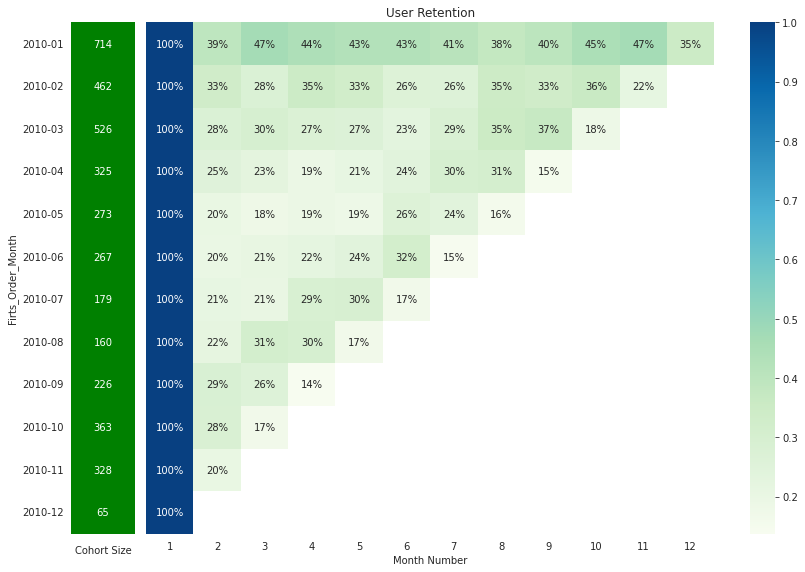

In [30]:
import matplotlib.colors as mcolors
with sns.axes_style('white'):
    fig, ax = plt.subplots(1,2, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios':[1,11]})
#User Retention
    sns.heatmap(df_retention, annot=True, fmt='.0%', cmap='GnBu', ax=ax[1])
    ax[1].set_title('User Retention')
    ax[1].set(xlabel ='Month Number', ylabel='')

#cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['green'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', ax=ax[0], cmap=white_cmap)
    ax[0].set(xlabel='Cohort Size', ylabel='Firts_Order_Month', xticklabels=[])
    ax[0].tick_params(bottom=False)
    fig.tight_layout()